Titanic Survival Analysis: Patterns and Insights
Author: Alireza Barzin Zanganeh
Date: July 10, 2025
Description: Comprehensive analysis of Titanic dataset to understand survival patterns

# 1. IMPORTS AND SETUP

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print('Titanic Survival Analysis')
print('=' * 50)
print('Author: Alireza Barzin Zanganeh')
print('Date: July 10, 2025')
print('=' * 50)


Titanic Survival Analysis
Author: Alireza Barzin Zanganeh
Date: July 10, 2025


# 2. DATA LOADING AND INITIAL EXPLORATION

In [17]:
df = sns.load_dataset('titanic')
print(f'Dataset shape: {df.shape}')
print(f'Columns: {list(df.columns)}')
print('\n First 5 rows:')
print(df.head())
print('\n Dataset Info:')
print(df.info())
print('\n Statistical Summary:')
print(df.describe())


Dataset shape: (891, 15)
Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

 First 5 rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

 Dataset Info:
<class 

# 3. DATA CLEANING

In [18]:
print('\n🧹 DATA CLEANING')
print('=' * 30)

print('Missing values before cleaning:')
print(df.isnull().sum())

df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df = df.drop('deck', axis=1)
df.dropna(subset=['embark_town'], inplace=True)

print('\nMissing values after cleaning:')
print(df.isnull().sum())

df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')
df['class'] = df['class'].astype('category')
df['who'] = df['who'].astype('category')
df['adult_male'] = df['adult_male'].astype('bool')
df['alone'] = df['alone'].astype('bool')

duplicates = df.duplicated().sum()
print(f'\nNumber of duplicate rows: {duplicates}')
if duplicates > 0:
    df = df.drop_duplicates()
    print(f'Removed {duplicates} duplicate rows')

print(f'\nFinal dataset shape: {df.shape}')



🧹 DATA CLEANING
Missing values before cleaning:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Missing values after cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

Number of duplicate rows: 116
Removed 116 duplicate rows

Final dataset shape: (773, 14)


# 4. EXPLORATORY DATA ANALYSIS

In [19]:
print('\n EXPLORATORY DATA ANALYSIS')
print('=' * 35)

total_passengers = len(df)
survivors = df['survived'].sum()
survival_rate = df['survived'].mean()

print(f'Total passengers: {total_passengers}')
print(f'Survivors: {survivors}')
print(f'Deaths: {total_passengers - survivors}')
print(f'Overall survival rate: {survival_rate:.2%}')

print('\n Survival by Gender:')
gender_survival = df.groupby('sex')['survived'].agg(['count', 'sum', 'mean'])
gender_survival.columns = ['Total', 'Survived', 'Survival Rate']
gender_survival['Survival Rate'] = gender_survival['Survival Rate'].apply(lambda x: f'{x:.1%}')
print(gender_survival)

print('\n Survival by Class:')
class_survival = df.groupby('class')['survived'].agg(['count', 'sum', 'mean'])
class_survival.columns = ['Total', 'Survived', 'Survival Rate']
class_survival['Survival Rate'] = class_survival['Survival Rate'].apply(lambda x: f'{x:.1%}')
print(class_survival)

print('\n Survival by Age Group:')
age_bins = [0, 17, 64, 100]
age_labels = ['Child', 'Adult', 'Senior']
df['age_group_temp'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
age_survival = df.groupby('age_group_temp')['survived'].agg(['count', 'sum', 'mean'])
age_survival.columns = ['Total', 'Survived', 'Survival Rate']
age_survival['Survival Rate'] = age_survival['Survival Rate'].apply(lambda x: f'{x:.1%}')
print(age_survival)



 EXPLORATORY DATA ANALYSIS
Total passengers: 773
Survivors: 318
Deaths: 455
Overall survival rate: 41.14%

 Survival by Gender:
        Total  Survived Survival Rate
sex                                  
female    290       214         73.8%
male      483       104         21.5%

 Survival by Class:
        Total  Survived Survival Rate
class                                
First     208       131         63.0%
Second    164        83         50.6%
Third     401       104         25.9%

 Survival by Age Group:
                Total  Survived Survival Rate
age_group_temp                               
Child              99        54         54.5%
Adult             661       263         39.8%
Senior             13         1          7.7%


# 5. VISUALIZATIONS


 CREATING VISUALIZATIONS


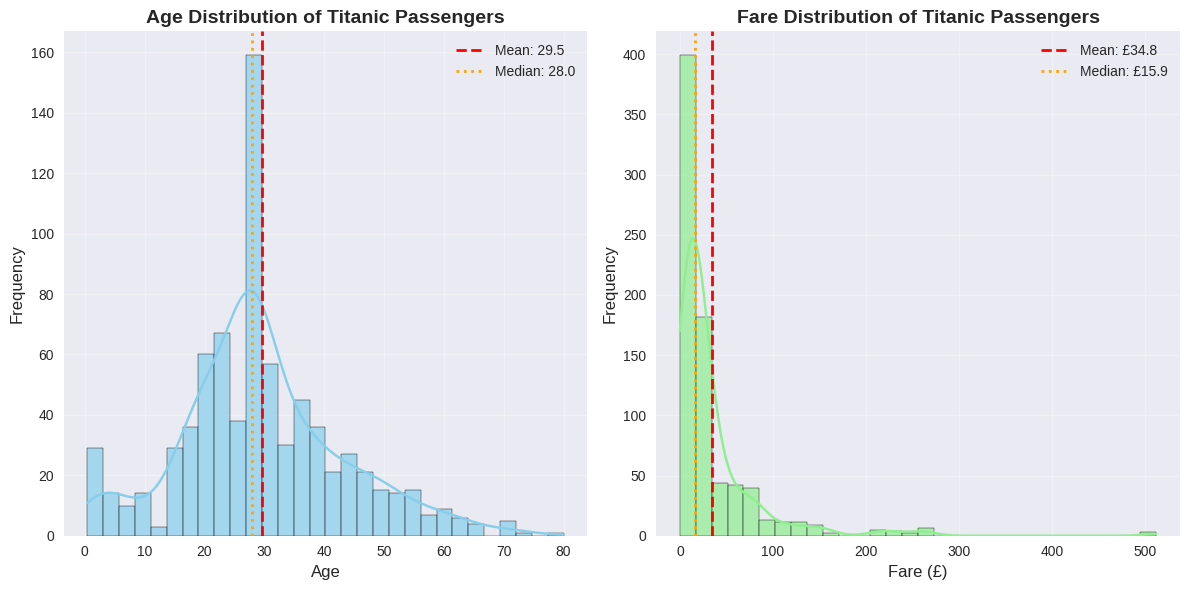

In [20]:
print('\n CREATING VISUALIZATIONS')
print('=' * 30)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=30, kde=True, color='skyblue', alpha=0.7)
plt.title('Age Distribution of Titanic Passengers', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["age"].mean():.1f}')
plt.axvline(df['age'].median(), color='orange', linestyle=':', linewidth=2, label=f'Median: {df["age"].median():.1f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
sns.histplot(df['fare'], bins=30, kde=True, color='lightgreen', alpha=0.7)
plt.title('Fare Distribution of Titanic Passengers', fontsize=14, fontweight='bold')
plt.xlabel('Fare (£)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df['fare'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: £{df["fare"].mean():.1f}')
plt.axvline(df['fare'].median(), color='orange', linestyle=':', linewidth=2, label=f'Median: £{df["fare"].median():.1f}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

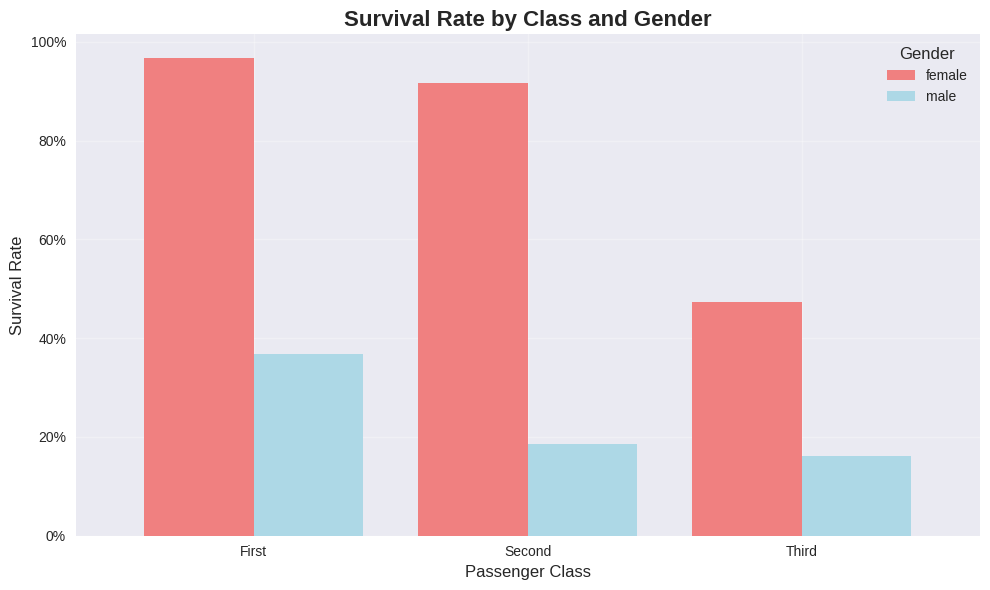

In [21]:
plt.figure(figsize=(12, 8))
survival_by_class_gender = df.groupby(['class', 'sex'])['survived'].mean().unstack()
survival_by_class_gender.plot(kind='bar', color=['lightcoral', 'lightblue'], figsize=(10, 6), width=0.8)
plt.title('Survival Rate by Class and Gender', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.legend(title='Gender', title_fontsize=12)
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


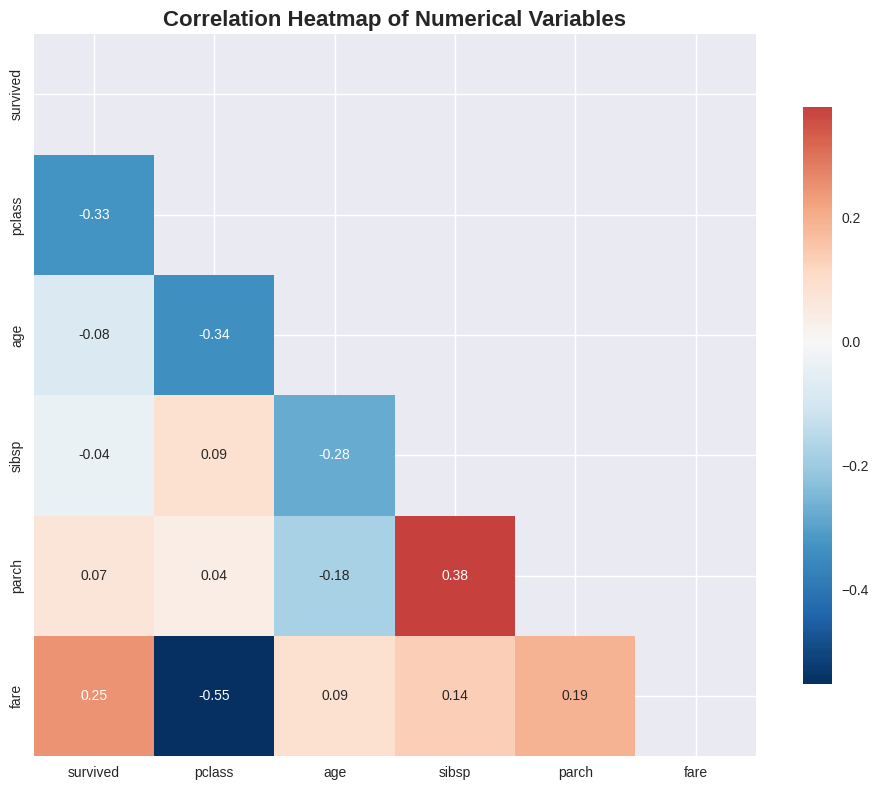

In [22]:
plt.figure(figsize=(10, 8))
numerical_cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
correlation_matrix = df[numerical_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0, square=True, fmt='.2f', cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# 6. OUTLIER DETECTION AND TREATMENT

In [23]:
print('\n OUTLIER DETECTION AND TREATMENT')
print('=' * 40)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print('Before outlier treatment:')
print(f'Age - Min: {df["age"].min():.1f}, Max: {df["age"].max():.1f}')
print(f'Fare - Min: {df["fare"].min():.1f}, Max: {df["fare"].max():.1f}')

age_outliers, age_lower, age_upper = detect_outliers_iqr(df, 'age')
fare_outliers, fare_lower, fare_upper = detect_outliers_iqr(df, 'fare')

print(f'\nAge outliers: {len(age_outliers)} (bounds: {age_lower:.1f} - {age_upper:.1f})')
print(f'Fare outliers: {len(fare_outliers)} (bounds: {fare_lower:.1f} - {fare_upper:.1f})')

df['fare'] = df['fare'].clip(lower=fare_lower, upper=fare_upper)
df['age'] = df['age'].clip(lower=age_lower, upper=age_upper)

print(f'\nAfter outlier treatment:')
print(f'Age - Min: {df["age"].min():.1f}, Max: {df["age"].max():.1f}')
print(f'Fare - Min: {df["fare"].min():.1f}, Max: {df["fare"].max():.1f}')



 OUTLIER DETECTION AND TREATMENT
Before outlier treatment:
Age - Min: 0.4, Max: 80.0
Fare - Min: 0.0, Max: 512.3

Age outliers: 26 (bounds: -1.5 - 58.5)
Fare outliers: 100 (bounds: -30.1 - 71.7)

After outlier treatment:
Age - Min: 0.4, Max: 58.5
Fare - Min: 0.0, Max: 71.7


# 7. FEATURE ENGINEERING

In [38]:
print('\n FEATURE ENGINEERING')
print('=' * 25)

df['age_group'] = pd.cut(df['age'], bins=[0, 17, 64, 130], right=False, labels=['Child', 'Adult', 'Senior'])
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = (df['family_size'] == 1).astype(int)
df['fare_brackedft'] = pd.qcut(df['fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

print('New features created:')
print(f'- Age Groups: {df["age_group"].value_counts().to_dict()}')
print(f'- Family Size: {df["family_size"].value_counts().sort_index().to_dict()}')
print(f'- Alone: {df["is_alone"].value_counts().to_dict()}')
print(f'- Fare Brackets: {df["fare_bracket"].value_counts().to_dict()}')


 FEATURE ENGINEERING
New features created:
- Age Groups: {'Adult': 674, 'Child': 99, 'Senior': 0}
- Family Size: {1: 435, 2: 154, 3: 101, 4: 28, 5: 13, 6: 22, 7: 12, 8: 6, 11: 2}
- Alone: {1: 435, 0: 338}
- Fare Brackets: {'Low': 211, 'Very High': 193, 'High': 192, 'Medium': 177}


# 8. ADVANCED ANALYSIS

In [36]:
print('\n ADVANCED ANALYSIS')
print('=' * 25)

print('Survival by Age Group and Gender:')
age_gender_survival = pd.crosstab([df['age_group'], df['sex']], df['survived'], margins=True, normalize='index')
print(age_gender_survival.round(3))

print('\nSurvival by Family Size:')
family_survival = df.groupby('family_size')['survived'].agg(['count', 'sum', 'mean'])
family_survival.columns = ['Total', 'Survived', 'Survival Rate']
family_survival['Survival Rate'] = family_survival['Survival Rate'].apply(lambda x: f'{x:.1%}')
print(family_survival)

from scipy.stats import chi2_contingency
print('\n Statistical Significance Tests:')
gender_crosstab = pd.crosstab(df['sex'], df['survived'])
chi2, p_value, dof, expected = chi2_contingency(gender_crosstab)
print(f'Gender vs Survival - Chi-square: {chi2:.3f}, p-value: {p_value:.2e}')
class_crosstab = pd.crosstab(df['class'], df['survived'])
chi2, p_value, dof, expected = chi2_contingency(class_crosstab)
print(f'Class vs Survival - Chi-square: {chi2:.3f}, p-value: {p_value:.2e}')



 ADVANCED ANALYSIS
Survival by Age Group and Gender:
survived              0      1
age_group sex                 
Child     female  0.333  0.667
          male    0.569  0.431
Adult     female  0.248  0.752
          male    0.810  0.190
All               0.589  0.411

Survival by Family Size:
             Total  Survived Survival Rate
family_size                               
1              435       145         33.3%
2              154        85         55.2%
3              101        58         57.4%
4               28        20         71.4%
5               13         3         23.1%
6               22         3         13.6%
7               12         4         33.3%
8                6         0          0.0%
11               2         0          0.0%

 Statistical Significance Tests:
Gender vs Survival - Chi-square: 202.229, p-value: 6.81e-46
Class vs Survival - Chi-square: 85.334, p-value: 2.95e-19


# 9. ADVANCED VISUALIZATIONS


 ADVANCED VISUALIZATIONS


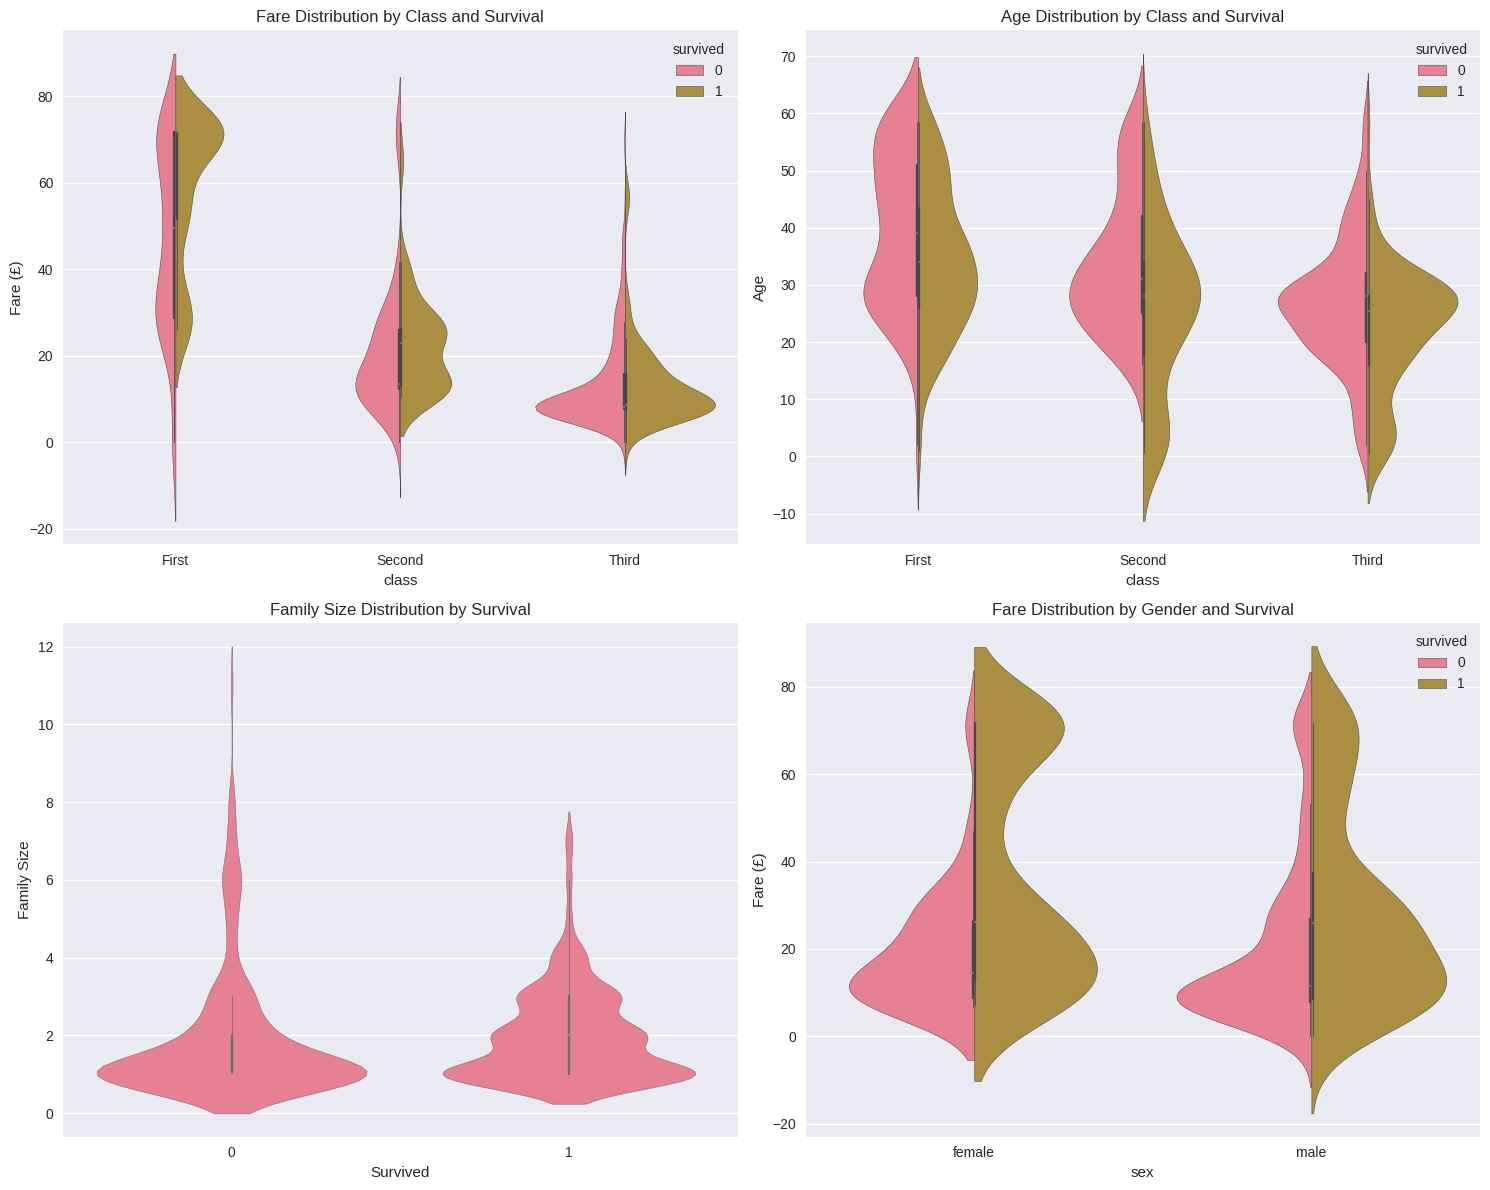

In [33]:
print('\n ADVANCED VISUALIZATIONS')
print('=' * 30)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.violinplot(x='class', y='fare', hue='survived', data=df, split=True, ax=axes[0,0])
axes[0,0].set_title('Fare Distribution by Class and Survival')
axes[0,0].set_ylabel('Fare (£)')
sns.violinplot(x='class', y='age', hue='survived', data=df, split=True, ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Class and Survival')
axes[0,1].set_ylabel('Age')
sns.violinplot(x='survived', y='family_size', data=df, ax=axes[1,0])
axes[1,0].set_title('Family Size Distribution by Survival')
axes[1,0].set_ylabel('Family Size')
axes[1,0].set_xlabel('Survived')
sns.violinplot(x='sex', y='fare', hue='survived', data=df, split=True, ax=axes[1,1])
axes[1,1].set_title('Fare Distribution by Gender and Survival')
axes[1,1].set_ylabel('Fare (£)')
plt.tight_layout()
plt.show()


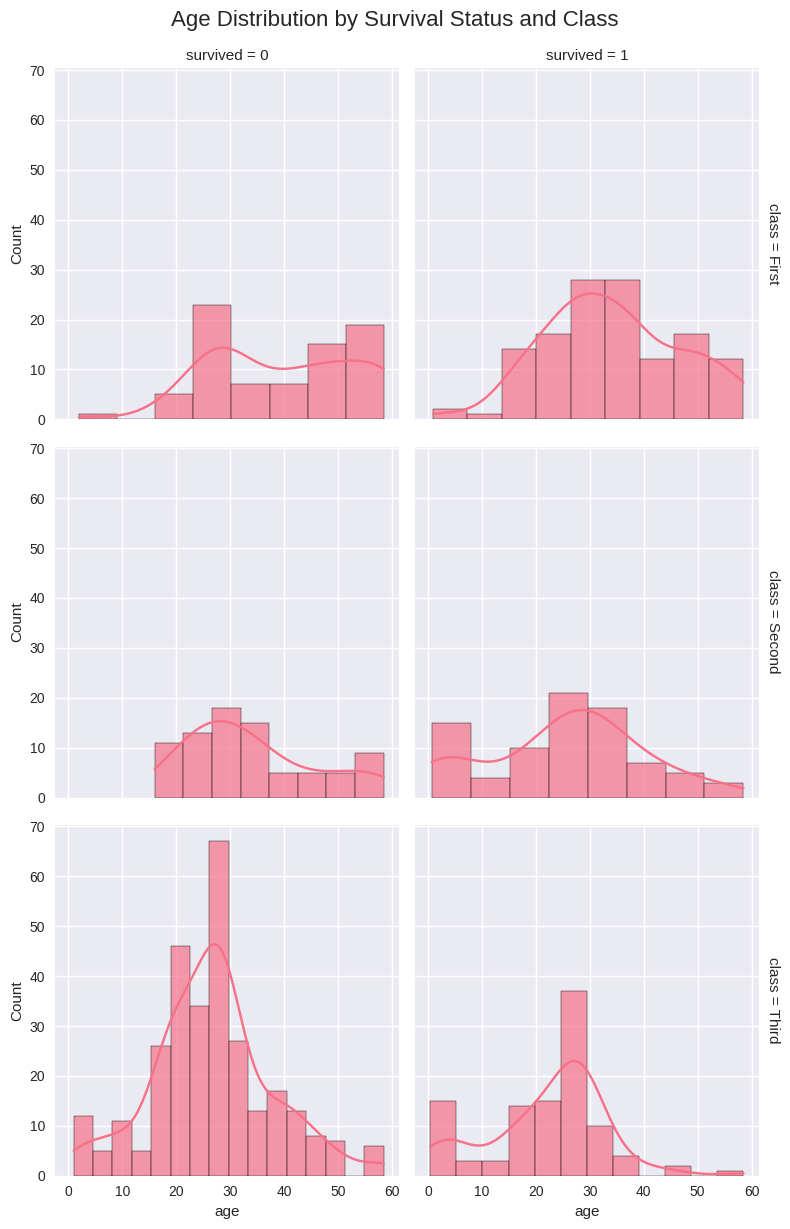

In [34]:
g = sns.FacetGrid(df, col='survived', row='class', margin_titles=True, height=4)
g.map(sns.histplot, 'age', kde=True, alpha=0.7)
g.fig.suptitle('Age Distribution by Survival Status and Class', y=1.02, fontsize=16)
plt.show()


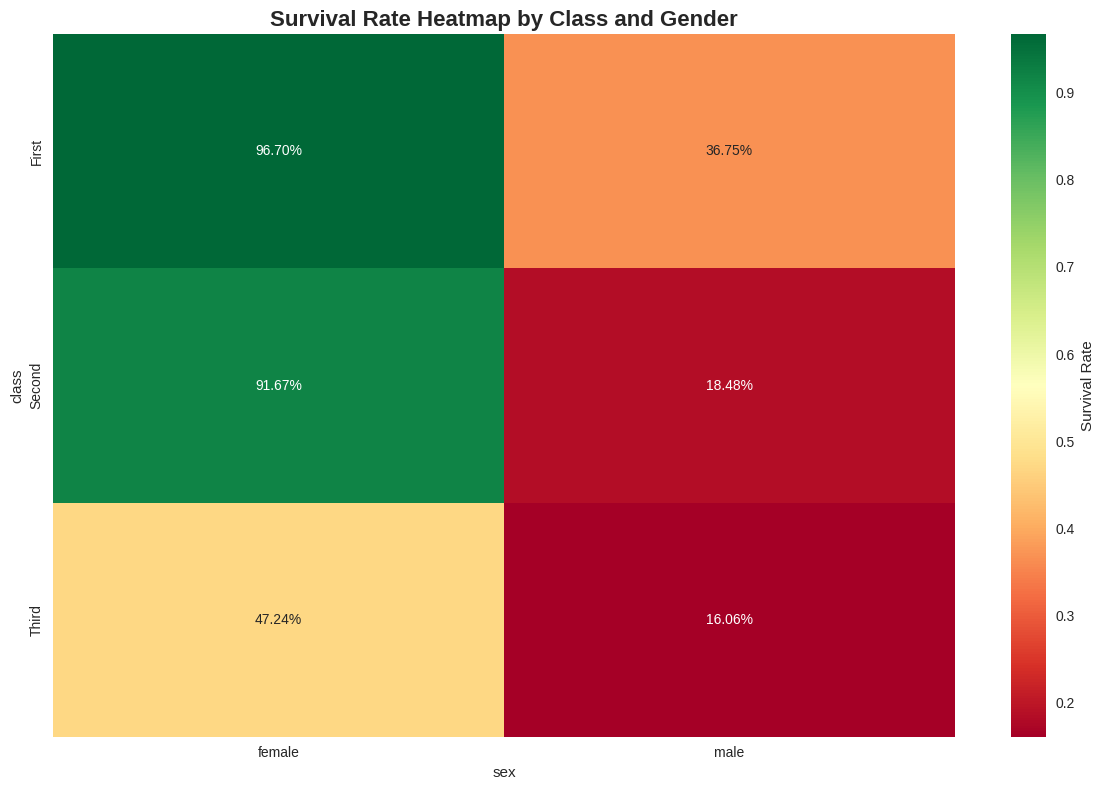

In [39]:
plt.figure(figsize=(12, 8))
survival_heatmap = df.pivot_table(values='survived', index='class', columns='sex', aggfunc='mean')
sns.heatmap(survival_heatmap, annot=True, fmt='.2%', cmap='RdYlGn', cbar_kws={'label': 'Survival Rate'})
plt.title('Survival Rate Heatmap by Class and Gender', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# 10. KEY FINDINGS SUMMARY

In [41]:
print('\n KEY FINDINGS SUMMARY')
print('=' * 30)

findings = {
    'Overall Survival Rate': f'{df["survived"].mean():.1%}',
    'Women Survival Rate': f'{df[df["sex"] == "female"]["survived"].mean():.1%}',
    'Men Survival Rate': f'{df[df["sex"] == "male"]["survived"].mean():.1%}',
    'Children Survival Rate': f'{df[df["age_group"] == "Child"]["survived"].mean():.1%}',
    'Adult Survival Rate': f'{df[df["age_group"] == "Adult"]["survived"].mean():.1%}',
    'First Class Survival': f'{df[df["class"] == "First"]["survived"].mean():.1%}',
    'Second Class Survival': f'{df[df["class"] == "Second"]["survived"].mean():.1%}',
    'Third Class Survival': f'{df[df["class"] == "Third"]["survived"].mean():.1%}',
    'Correlation (Fare-Survival)': f'{df["fare"].corr(df["survived"]):.3f}',
    'Average Family Size': f'{df["family_size"].mean():.1f}'
}

for key, value in findings.items():
    print(f'{key}: {value}')



 KEY FINDINGS SUMMARY
Overall Survival Rate: 41.1%
Women Survival Rate: 73.8%
Men Survival Rate: 21.5%
Children Survival Rate: 54.5%
Adult Survival Rate: 39.2%
First Class Survival: 63.0%
Second Class Survival: 50.6%
Third Class Survival: 25.9%
Correlation (Fare-Survival): 0.302
Average Family Size: 2.0


# 11. EXPORT PROCESSED DATA

In [46]:
print('\n EXPORTING PROCESSED DATA')
print('=' * 30)

if os.path.exists('data/titanic_processed.csv'):
    print('Warning: File already exists. Choose a different path or rename.')
else:
    df.to_csv('data/titanic_processed.csv', index=False)

summary_stats = {
    'Total Passengers': len(df),
    'Survivors': df['survived'].sum(),
    'Deaths': len(df) - df['survived'].sum(),
    'Survival Rate': f'{df["survived"].mean():.2%}',
    'Average Age': f'{df["age"].mean():.1f}',
    'Average Fare': f'£{df["fare"].mean():.2f}',
    'Most Common Class': df['class'].mode().iloc[0],
    'Most Common Embark Port': df['embarked'].mode().iloc[0]
}

print('\n Summary Statistics:')
for key, value in summary_stats.items():
    print(f'{key}: {value}')

print('\n🎉 Analysis Complete!')
print('=' * 30)
print('This comprehensive analysis has revealed key patterns in Titanic survival data:')
print('1. Gender was the strongest predictor of survival')
print('2. Social class significantly impacted survival odds')
print('3. The "women and children first" policy was clearly implemented')
print('4. Higher fare passengers had better survival rates')
print('5. Family size played a role in survival outcomes')
print('\nThe cleaned dataset is ready for machine learning modeling!')



 EXPORTING PROCESSED DATA


OSError: Cannot save file into a non-existent directory: 'data'